## Analyzing Fire Severity Datasets

#### MTBS 
https://mtbs.gov/direct-download

#### FHSZ
https://gis.data.ca.gov/maps/CALFIRE-Forestry::california-fire-hazard-severity-zones-fhsz/explore?location=37.178126%2C-120.206150%2C6.94

In [117]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [118]:
os.chdir('/Users/minho/Desktop/Projects/C3AI/Goal1')
fhsz = gpd.read_file('FHSZ_4269.shp') # 
MTBS = gpd.read_file('MTBS_4269.shp')
cali_bnd = gpd.read_file('CA_State_TIGER2016.shp').to_crs("EPSG:4269")

In [120]:
MTBS.keys()

Index(['OBJECTID', 'ACRES', 'FIRE_ID', 'FIRE_NAME', 'YEAR', 'STARTMONTH',
       'STARTDAY', 'FIRE_TYPE', 'IRWINID', 'MAP_ID', 'MAP_PROG', 'ASMNT_TYPE',
       'IG_DATE', 'PRE_ID', 'POST_ID', 'PERIM_ID', 'DNBR_OFFST', 'DNBR_STDDV',
       'NODATA_THR', 'GREENNESS_', 'LOW_THRESH', 'MODERATE_T', 'HIGH_THRES',
       'COMMENTS', 'LATITUDE', 'LONGITUDE', 'SHAPEAREA', 'SHAPELEN',
       'geometry'],
      dtype='object')

In [121]:
# Filter MTBS
# (1) Ignition type
# (2) Year of fire
# (3) Severity

<AxesSubplot:>

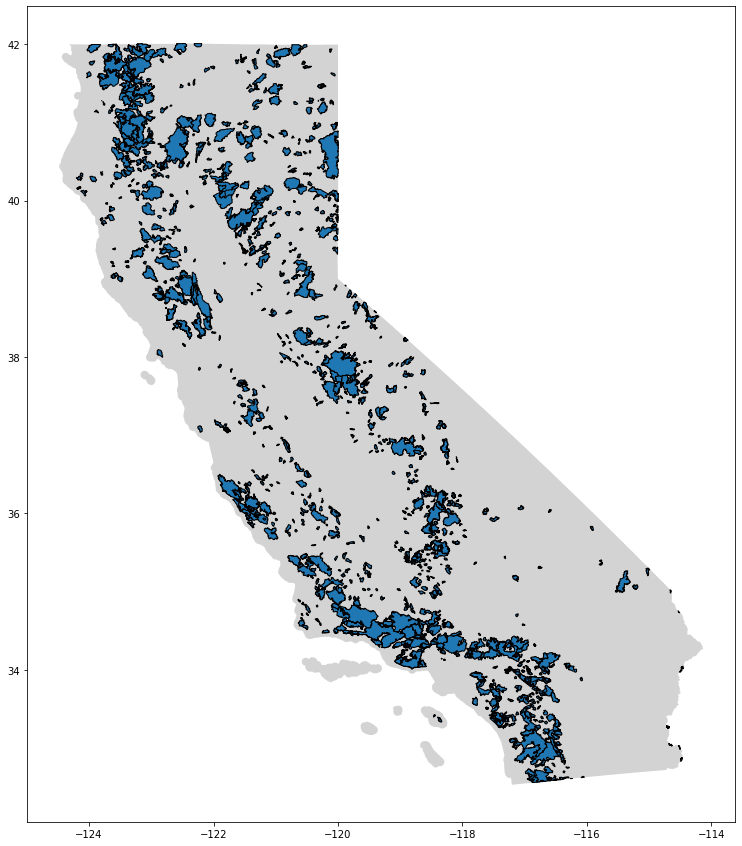

In [122]:
# Only wildfires with mod~high severity
filt_df = MTBS[(MTBS['FIRE_TYPE']=='Wildfire') & (MTBS['MODERATE_T']>0) & (MTBS['HIGH_THRES']>0)]
filt_df=filt_df.reset_index(drop=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
cali_bnd.plot(ax=ax,color='lightgray')
filt_df.plot(ax=ax, edgecolor='black', legend=True)

In [115]:
filt_df.to_file('MTBS_mhighsev_wildfire.shp')

In [99]:
filt_df.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

,OBJECTID,ACRES,FIRE_ID,FIRE_NAME,YEAR,STARTMONTH,STARTDAY,FIRE_TYPE,IRWINID,MAP_ID,...,GREENNESS_,LOW_THRESH,MODERATE_T,HIGH_THRES,COMMENTS,LATITUDE,LONGITUDE,SHAPEAREA,SHAPELEN,geometry
0,21,3021,CA3268211688619840421,PROCTOR,1984,4,21,Wildfire,None,4637,...,-150,130,359,630,None,32.682,-116.886,0.001175,0.150579,"POLYGON ((-116.89745 32.69498, -116.89574 32.6..."
1,22,3073,CA3294511693519840906,BOWLES,1984,9,6,Wildfire,None,4638,...,9999,200,-116,-9999,None,32.945,-116.935,0.001199,0.216518,"POLYGON ((-116.92175 32.95230, -116.92174 32.9..."
2,23,5564,CA3341311687319840530,AGUANGA,1984,5,30,Wildfire,None,4663,...,-150,50,151,300,None,33.413,-116.873,0.002183,0.318231,"POLYGON ((-116.88183 33.43474, -116.88175 33.4..."
3,24,1384,CA3375011772919840615,LOMA RIDGE,1984,6,15,Wildfire,None,4639,...,-150,80,286,530,None,33.750,-117.729,0.000545,0.171441,"POLYGON ((-117.74563 33.75050, -117.74673 33.7..."
4,25,4130,CA3402311625519840531,LOST HORSE,1984,5,31,Wildfire,None,4678,...,9999,-90,-201,-275,None,34.023,-116.255,0.001632,0.285613,"POLYGON ((-116.25756 34.05439, -116.25756 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,24689,39455,CA4139512105720180815,STONE,2018,8,15,Wildfire,FA54DA8D-9C94-4CD6-9C30-F7EF25522803,10012496,...,-150,50,259,500,None,41.425,-121.013,0.017198,1.024377,"POLYGON ((-120.92224 41.45791, -120.92222 41.4..."
1794,24690,38188,CA4188012254020180705,KLAMATHON,2018,7,5,Wildfire,373CAAC0-9D6D-4A91-8B55-7986A13983FC,10012453,...,-150,50,297,570,None,41.946,-122.534,0.016783,1.079968,"POLYGON ((-122.57430 42.00682, -122.57393 42.0..."
1795,24691,1023,CA4192012170520180516,CALKR-FY18-RX-KLB-LOWER KLAMATH HFR-UNITS 11A1...,2018,5,16,Prescribed Fire,None,10012126,...,-150,70,9999,9999,None,41.924,-121.699,0.000450,0.152112,"POLYGON ((-121.70968 41.92355, -121.71018 41.9..."
1796,24692,2270,CA4193212150720180221,CATKR-FY18-RX-KLB-TULE LAKE HFR-SUMP 1A,2018,2,21,Prescribed Fire,None,10012123,...,9999,200,-9999,-9999,None,41.924,-121.512,0.000997,0.158807,"POLYGON ((-121.50479 41.91016, -121.50494 41.9..."


ValueError: shape mismatch: objects cannot be broadcast to a single shape

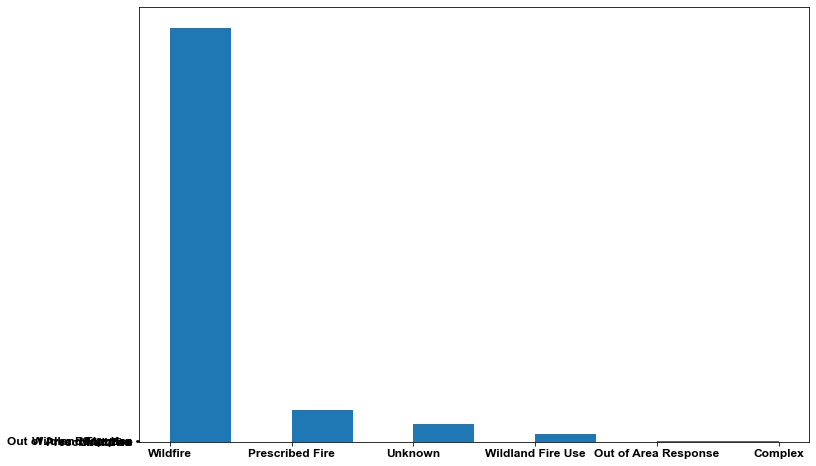

In [142]:
font = {'family' : 'arial',
        'size'   : 12}

import matplotlib
matplotlib.rc('font', **font)

plt.figure(figsize=[12,8])
plt.hist(MTBS['FIRE_TYPE'])

plt.bar(['Wildfire', 'Prescribed Fire', 'Unknown','Out of Area','Out of Area Reponse'], MTBS['FIRE_TYPE'], align='center')


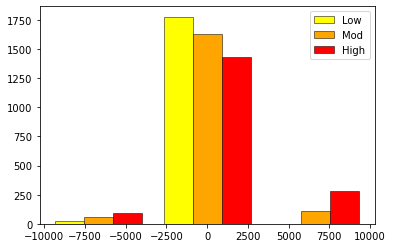

In [12]:
plt.hist((MTBS['LOW_THRESH'], MTBS['MODERATE_T'], MTBS['HIGH_THRES']), 
         3, label = ("Low", "Mod","High"), 
         color = ["yellow","orange","red"], ec="black",lw=0.5)
plt.legend()
# plt.xticks((-7500,0,7500),('Low','Mod','High'))

(array([4755.,    0.,    0.,    0.,    0., 4568.,    0.,    0.,    0.,
        7944.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

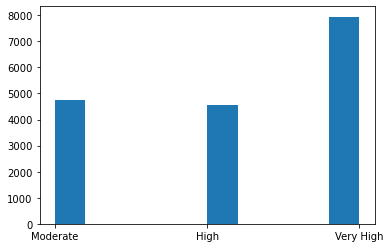

In [8]:
plt.hist(fhsz['HAZ_CLASS'])